<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/checks/context_awareness/context_utlization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>


<h1 style="text-align: center;">Sub-Query Completeness</h1>


**What is Sub-Query Completeness?**: Sub-Query Completeness checks whether the sub-queries generated from a question are complete. This check considers all the sub-queries and evaluate if all of them taken together answers all aspects of the question or not


**Data schema**: The data schema required for this evaluation is as follows:

| Column Name | Description                     |
| ----------- | ------------------------------- |
| question    | The question asked by the user  |
| sub_questions | Sub questions generated from the question |

 If you face any difficulties, need some help with using UpTrain or want to brainstorm on custom evaluations for your use-case, [speak to the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

## Step 1: Install UpTrain by running 'pip install uptrain'

In [1]:
# !pip install uptrain

## Step 2: Let's define our dataset to run evaluations upon

In [2]:
data = [
    {
        'question': 'What is the Taj Mahal? When was it built, where and by whom',
        'sub_questions': '1. What is the Taj Mahal? 2. When was the Taj Mahal built? 3. Where is the Taj Mahal? 4. Who built the Taj Mahal?'        
    },
    {
        'question': 'What is the Taj Mahal? When was it built, where and by whom',
        'sub_questions': '1. What is the Taj Mahal? '        
    }
]

## Step 3: Running evaluations using UpTrain's Open-Source Software (OSS)

In [3]:
from uptrain import EvalLLM, Evals
import json

OPENAI_API_KEY = "sk-********************"  # Insert your OpenAI key here

eval_llm = EvalLLM(openai_api_key=OPENAI_API_KEY)

res = eval_llm.evaluate(
    data = data,
    checks = [Evals.SUB_QUERY_COMPLETENESS]
)

print(json.dumps(res,indent=3))

/Users/shreyanshjain/anaconda3/lib/python3.11/site-packages/lazy_loader/__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)
2024-02-28 16:51:36.406 | INFO     | uptrain.framework.evalllm:evaluate_on_server:216 - Sending evaluation request for rows 0 to <50 to the Uptrain


[
   {
      "question": "What is the Taj Mahal? When was it built, where and by whom",
      "sub_questions": "1. What is the Taj Mahal? 2. When was the Taj Mahal built? 3. Where is the Taj Mahal? 4. Who built the Taj Mahal?",
      "score_sub_query_completeness": 1.0,
      "explanation_sub_query_completeness": "Step by step reasoning:\n\n1. What is the Taj Mahal? - This sub-question covers the aspect of understanding what the Taj Mahal is, providing information about its nature and purpose.\n2. When was the Taj Mahal built? - This sub-question covers the aspect of the time of construction, addressing the historical timeline of the Taj Mahal's creation.\n3. Where is the Taj Mahal? - This sub-question covers the aspect of location, providing information about the geographical placement of the Taj Mahal.\n4. Who built the Taj Mahal? - This sub-question covers the aspect of the creator, addressing the individuals or entities responsible for the construction of the Taj Mahal.\n\nConclusi

## Step 4: Let's look at some of the results 

### Sample with Complete Sub-queries

In [4]:
print(json.dumps(res[0],indent=3))

{
   "question": "What is the Taj Mahal? When was it built, where and by whom",
   "sub_questions": "1. What is the Taj Mahal? 2. When was the Taj Mahal built? 3. Where is the Taj Mahal? 4. Who built the Taj Mahal?",
   "score_sub_query_completeness": 1.0,
   "explanation_sub_query_completeness": "Step by step reasoning:\n\n1. What is the Taj Mahal? - This sub-question covers the aspect of understanding what the Taj Mahal is, providing information about its nature and purpose.\n2. When was the Taj Mahal built? - This sub-question covers the aspect of the time of construction, addressing the historical timeline of the Taj Mahal's creation.\n3. Where is the Taj Mahal? - This sub-question covers the aspect of location, providing information about the geographical placement of the Taj Mahal.\n4. Who built the Taj Mahal? - This sub-question covers the aspect of the creator, addressing the individuals or entities responsible for the construction of the Taj Mahal.\n\nConclusion:\nThe sub-ques

### Sample with Incomplete Sub-queries

In [5]:
print(json.dumps(res[1],indent=3))

{
   "question": "What is the Taj Mahal? When was it built, where and by whom",
   "sub_questions": "1. What is the Taj Mahal? ",
   "score_sub_query_completeness": 0.0,
   "explanation_sub_query_completeness": "Step by step reasoning:\n\n1. The main question is \"What is the Taj Mahal? When was it built, where and by whom.\"\n2. The sub-question provided is \"What is the Taj Mahal?\"\n3. The sub-question does not cover the aspects of when it was built, where, and by whom.\n4. The sub-question collectively does not cover any aspects of the main question.\n\n[Choice]: (C) Sub Questions collectively does not cover any aspects of the main question.\n[Explanation]: The sub-question provided collectively does not cover any aspects of the main question."
}


## [Optional] Step 5: UpTrain Managed Service and Dashboards

You can create a free UpTrain account [here](https://uptrain.ai/) and get free trial credits. If you want more trial credits, [book a call with the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

UpTrain Managed service provides:
1. Dashboards with advanced drill-down and filtering options
2. Insights and common topics among failing cases
3. Observability and real-time monitoring of production data
4. Regression testing via seamless integration with your CI/CD pipelines

In [6]:
from uptrain import Evals, APIClient, Settings

UPTRAIN_API_KEY = "up-********************"  # Insert your UpTrain API key here

uptrain_client = APIClient(
    Settings(
        uptrain_access_token=UPTRAIN_API_KEY, response_format={"type": "json_object"}
    )
)

res = uptrain_client.log_and_evaluate(
    "Sample-sub-query-completeness", 
    data = data, 
    checks = [Evals.SUB_QUERY_COMPLETENESS]
)

print(json.dumps(res, indent=3))

2024-02-28 16:51:39.840 | INFO     | uptrain.framework.remote:log_and_evaluate:669 - Sending evaluation request for rows 0 to <50 to the Uptrain server


[
   {
      "question": "What is the Taj Mahal? When was it built, where and by whom",
      "sub_questions": "1. What is the Taj Mahal? 2. When was the Taj Mahal built? 3. Where is the Taj Mahal? 4. Who built the Taj Mahal?",
      "score_sub_query_completeness": 1.0,
      "explanation_sub_query_completeness": "Step by step reasoning:\n\n1. What is the Taj Mahal? - This sub-question covers the aspect of understanding what the Taj Mahal is, providing information about its nature and purpose.\n2. When was the Taj Mahal built? - This sub-question covers the aspect of the time of construction, addressing the historical timeline of the Taj Mahal's creation.\n3. Where is the Taj Mahal? - This sub-question covers the aspect of location, providing information about the geographical placement of the Taj Mahal.\n4. Who built the Taj Mahal? - This sub-question covers the aspect of the creator, addressing the individuals or entities responsible for the construction of the Taj Mahal.\n\nConsider

### Dashboards: 
Histogram of score vs number of cases with that score

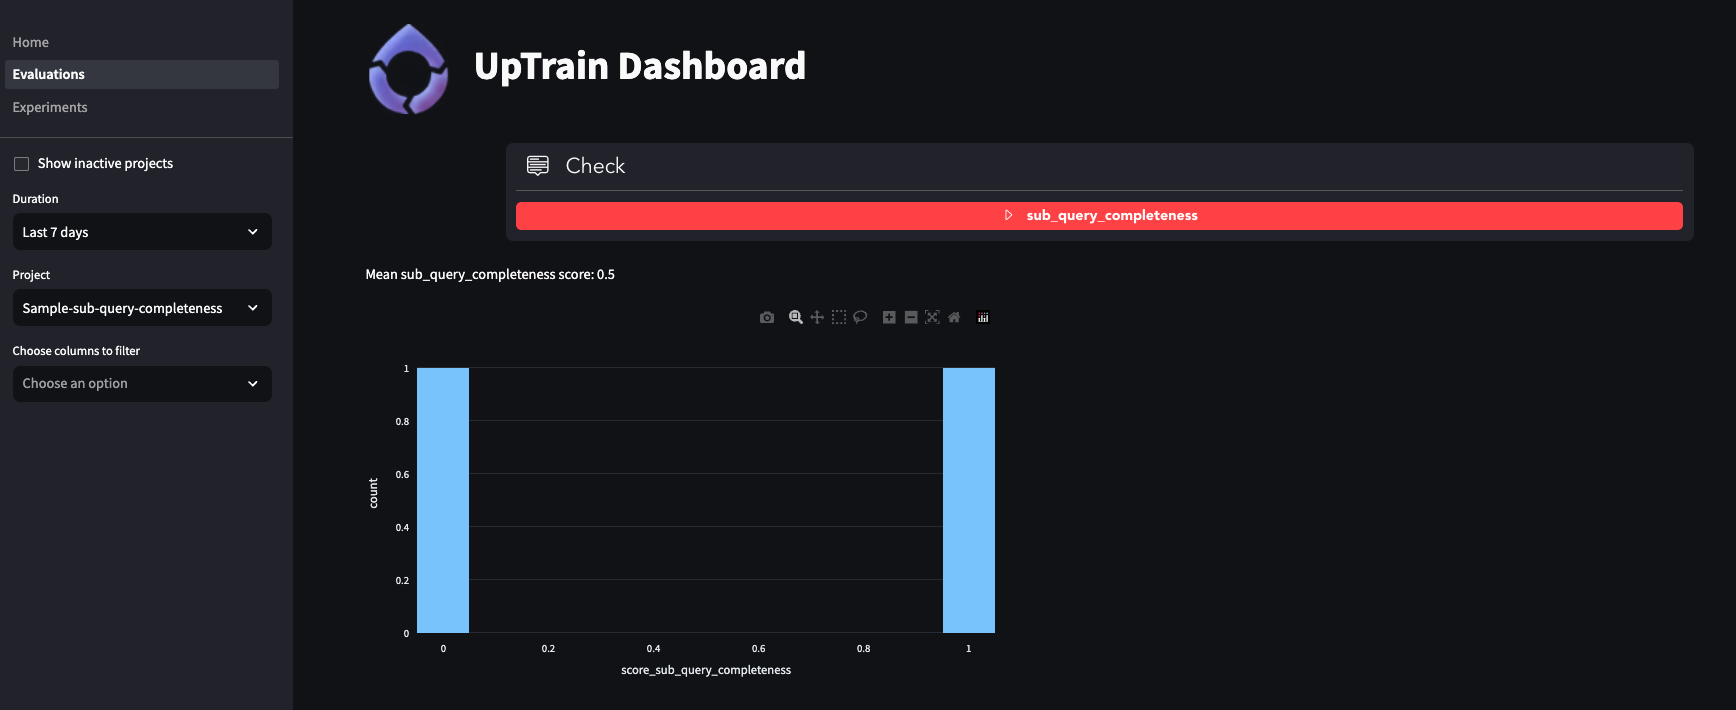

### Insights:
You can filter failure cases and generate common topics among them. This can help identify the core issue and help fix it

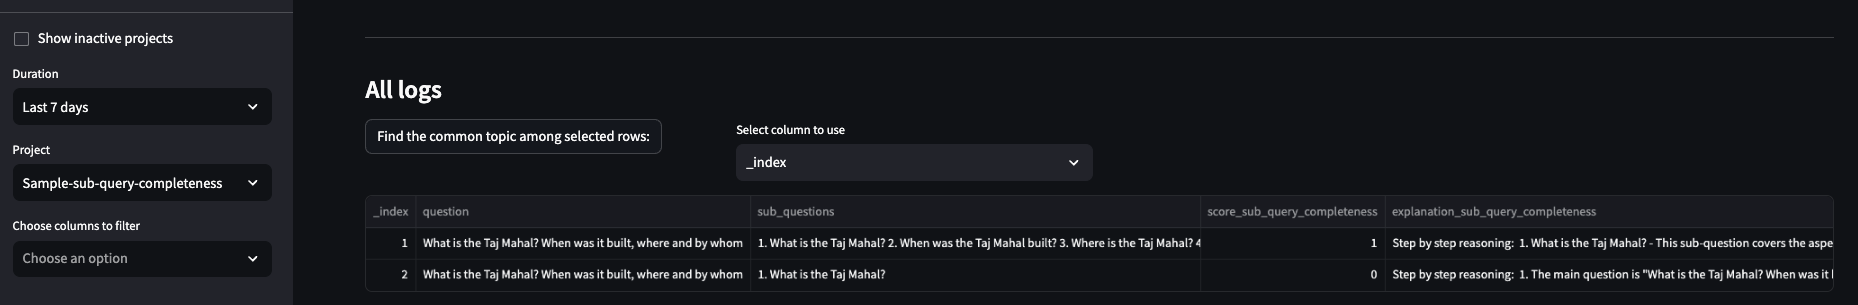